# Setup
## import calour

In [1]:
import calour as ca

## we want to get also INFO messages from Calour
(default is 30 which is only warnings)

In [2]:
ca.set_log_level(20)

## and we want interactive plots inside the notebook

In [3]:
%matplotlib notebook

# Load the data
We use read_amplicon, which adds some amplicon experiment specific functions such as filter_taxonomy etc.

Useful parameters are:
- biom table name
- mapping file name (can be None if no sample metadata available)
- filter_reads - the minimal number of reads per sample in order to keep it
- normalize - the depth to normalize each sample to (note it is not rarefaction butn normalization to constant sum)

In [4]:
exp = ca.read_amplicon(data_file='data/moving_pic.biom', sample_metadata_file='data/moving_pic.sample.txt', filter_reads=1000, normalize=10000)

2017-03-12 21:32:24 INFO loaded 1968 samples, 7056 observations
2017-03-12 21:32:25 INFO 1967 remaining


In [5]:
exp

AmpliconExperiment moving_pic.biom with 1967 samples, 7056 features

# each Experiment is made of the following properties:
## data : a data sparse/dense 2D array
(can specify via the sparse property )

Each row is a sample, each column a feature (i.e. sOTU)

In [6]:
exp.data

<1967x7056 sparse matrix of type '<class 'numpy.float64'>'
	with 130081 stored elements in Compressed Sparse Row format>

## sample_metadata : a pandas dataframe with one row per sample
index is the SampleID (first column in the mapping file), matching the biom table sampleIDs

In [7]:
exp.sample_metadata.head(5)

,#SampleID,#SampleID.1,BarcodeSequence,LinkerPrimerSequence,DAYS_SINCE_EPOCH,TARGET_SUBFRAGMENT,ASSIGNED_FROM_GEO,EXPERIMENT_CENTER,TITLE,COMMON_SAMPLE_SITE,...,KEY_SEQ,BODY_PRODUCT,AGE_IN_YEARS,RUN_CENTER,LIBRARY_CONSTRUCTION_PROTOCOL,LATITUDE,REGION,HOST_INDIVIDUAL,Description,_calour_original_abundance
#SampleID,,,,,,,,,,,,,,,,,,,,,
L2S137.273277,L2S137.273277,L2S137.273277,AATCAGTCTCGT,GTGCCAGCMGCCGCGGTAA,14223,V4,n,CCME,Moving_pictures_of_the_human_microbiome,L_palm,...,none,UBERON:zone of skin of hand,None,CGS-GL,"Five primers, two for PCR and three for sequen...",40.014986,L2,F4,illumina_time_series,10000.0
L3S167.273782,L3S167.273782,L3S167.273782,TACTTCGCTCGC,GTGCCAGCMGCCGCGGTAA,14526,V4,n,CCME,Moving_pictures_of_the_human_microbiome,L_palm,...,none,UBERON:zone of skin of hand,None,CGS-GL,"Five primers, two for PCR and three for sequen...",40.014986,L3,M3,illumina_time_series,10000.0
L4S102.275028,L4S102.275028,L4S102.275028,GCAATAGCTGCT,GTGCCAGCMGCCGCGGTAA,14310,V4,n,CCME,Moving_pictures_of_the_human_microbiome,R_palm,...,none,UBERON:zone of skin of hand,None,CGS-GL,"Five primers, two for PCR and three for sequen...",40.014986,L4,M3,illumina_time_series,10000.0
L6S243.274842,L6S243.274842,L6S243.274842,ACGAGTGCTATC,GTGCCAGCMGCCGCGGTAA,14507,V4,n,CCME,Moving_pictures_of_the_human_microbiome,Tongue,...,none,UBERON:tongue,None,CGS-GL,"Five primers, two for PCR and three for sequen...",40.014986,L6,M3,illumina_time_series,10000.0
L3S240.274358,L3S240.274358,L3S240.274358,AGTACGCTCGAG,GTGCCAGCMGCCGCGGTAA,14178,V4,n,CCME,Moving_pictures_of_the_human_microbiome,R_palm,...,none,UBERON:zone of skin of hand,None,CGS-GL,"Five primers, two for PCR and three for sequen...",40.014986,L3,F4,illumina_time_series,10000.0


## feature_metadata : a pandas dataframe with one row per feature (i.e. sOTU)
For deblurred sequences, index is the actual sequence, matching the biom table

Additional properties are loaded from biom table observation metadata (i.e. taxonomy)

In [8]:
exp.feature_metadata.head(5)

,id,taxonomy
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCTTAGGCGGCAAATTAAGTTAGTGGTTAAATAGTTCGGCTCAACCGGATTTCGCCATTAAAACTGATATGCTAGAGATTAAACGAGGTAGGCGGAATAAGTTA,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTG...,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidal...
TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCTGTTTCGTAAGTCGTGTGTGAAAGGTGCGGGCTCAACCCGCGGACGGCACATGATACTGCGAGACTAGAGTAATGGAGGGGGAACCGGAATTCTCG,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria;Verrucomicrobia;Verrucomicrobiae;Verr...
TACGTAGGGTGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGGGCTCGTAGGCGGTTTGTTGCGTCGGGAGTGAAAACTCAGGGCTTAACCCTGAGCCTGCTTCCGATACGGGCAGACTAGAGGTATGCAGGGGAGAACGGAATTCCTG,TACGTAGGGTGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGGGCT...,Bacteria;Actinobacteria;Actinobacteria;Actinom...
TACGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGTGTAGGTGGCCATGCAAGTCAGAAGTGAAAATCCGGGGCTCAACCCCGGAACTGCTTTTGAAACTGCAGGGCTAGAGTGCAGGAGGGGCAAGTGGAATTCCTA,TACGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAG...,Bacteria;Firmicutes;Clostridia;Clostridiales;L...
TACGTAGGTGGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGCTGATTAAGTCAGCGGTGAAAGGTAGCAGCTTAACTGTTTTACATGCCGTTGATACTGGTTAGCTTGAGTTGACAGAAGGCAGATAGAATTCCT,TACGTAGGTGGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria;Bacteroidetes;Cytophagia;Cytophagales...


## The data array and sample and feature metadata are always synchronized to the same order

so lets start the analysis

# Analysis

## divide to per sample-type experiments
what sample types do we have?

In [9]:
exp.sample_metadata['BODY_PRODUCT'].unique()

array(['UBERON:zone of skin of hand', 'UBERON:tongue', 'UBERON:feces'], dtype=object)

lets split

In [10]:
feces = exp.filter_samples('BODY_PRODUCT', 'UBERON:feces')
tongue = exp.filter_samples('BODY_PRODUCT', 'UBERON:tongue')
# just to have fun, let's negate and use multiple values
hand = exp.filter_samples('BODY_PRODUCT', ['UBERON:feces', 'UBERON:tongue'], negate=True )

In [11]:
feces

AmpliconExperiment moving_pic.biom with 467 samples, 7056 features

In [12]:
tongue

AmpliconExperiment moving_pic.biom with 508 samples, 7056 features

In [13]:
hand

AmpliconExperiment moving_pic.biom with 992 samples, 7056 features

Note that filtering does not get rid of features not present in the set of samples - we'll do it later

## cluster the features so similar features are ordered close to each other
Also we'll get rid of features will less than 10 total reads over all samples together (not interesting and slows clustering)

In [14]:
feces = feces.cluster_features(min_abundance=10)

2017-03-12 21:32:57 INFO 1145 remaining


In [15]:
feces

AmpliconExperiment moving_pic.biom with 467 samples, 1145 features

## since it's a time series - let's sort by the time field
order from previous sorting is perseved if a tie (stable sort)

In [16]:
feces = feces.sort_samples('DAYS_SINCE_EXPERIMENT_START')

can also be done inplace as:

In [17]:
feces.sort_samples('DAYS_SINCE_EXPERIMENT_START', inplace=True)

AmpliconExperiment moving_pic.biom with 467 samples, 1145 features

## and now let's plot it.
We use the plot_sort shortcut which does a sort on a (set) of fields and then plots.
We can specify the type of interactive heatmap using the gui= parameter:
- 'jupyter' plots an interactive plot inside the notebook
- 'qt5' opens the plot in an interactive qt5 window
- None just creates the matplotlib figure

<IPython.core.display.Javascript object>


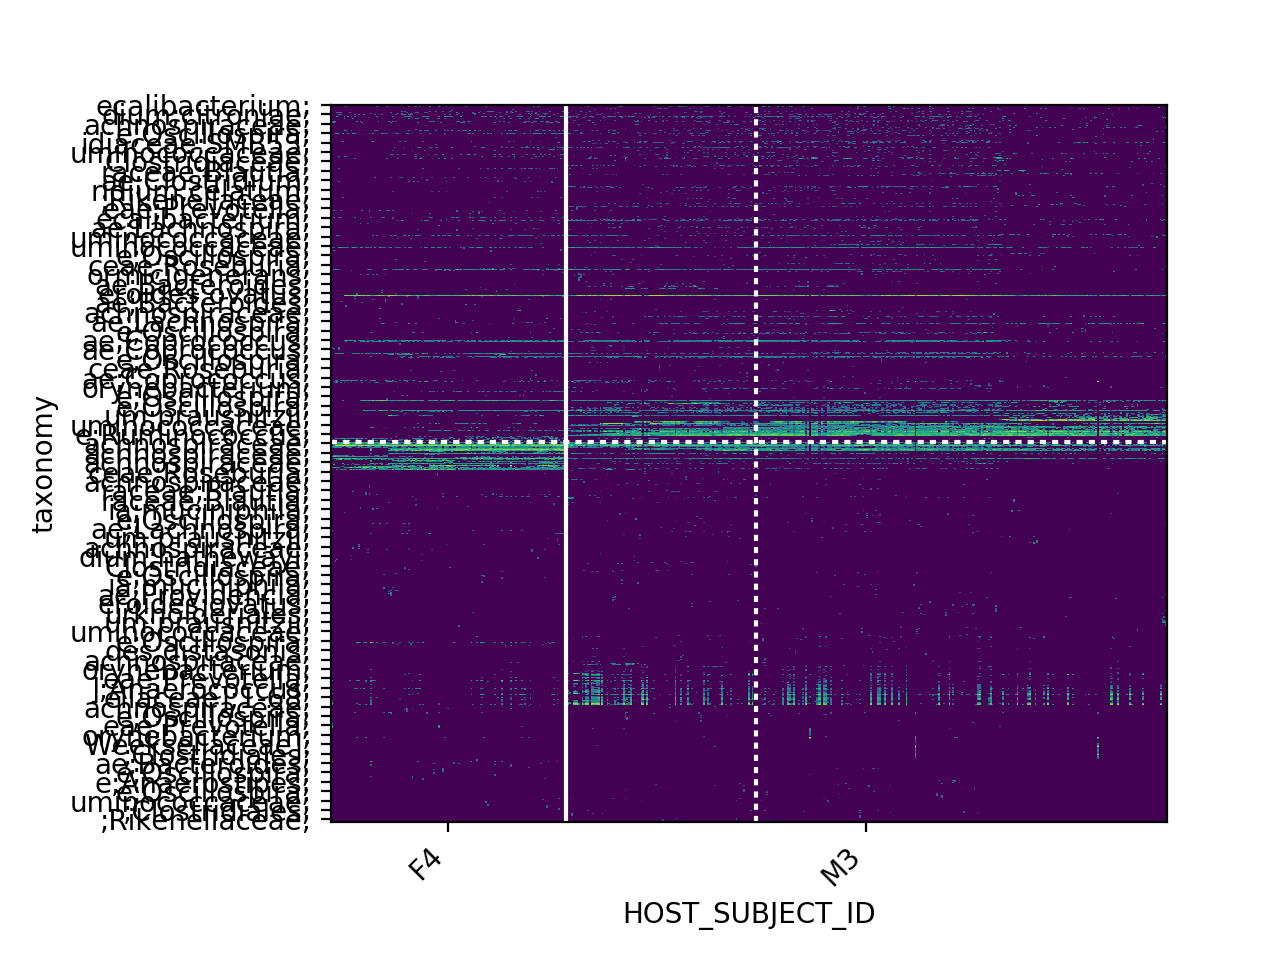

In [18]:
feces.plot_sort(fields='HOST_SUBJECT_ID', gui='jupyter')

## Look at more common bacteria (at least 0.1% mean)

In [19]:
tt=feces.filter_mean(0.001)

2017-03-12 21:37:34 INFO 114 remaining


and lets do qt gui to test the enrichment of the strange sporadic bacteria

<IPython.core.display.Javascript object>


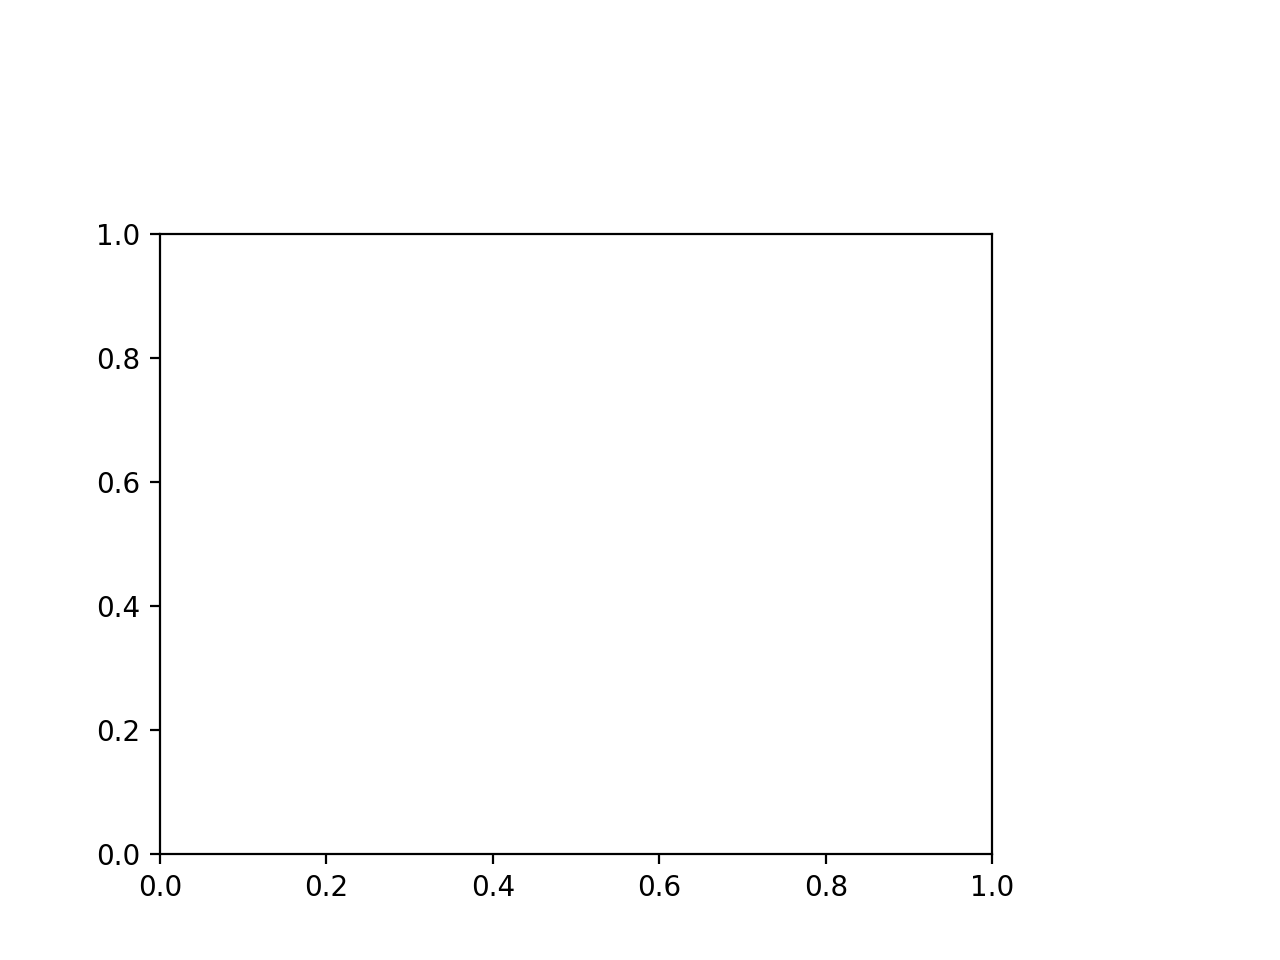

found 45
found 45


In [20]:
tt.plot_sort('HOST_SUBJECT_ID',gui='qt5')

## Some more analysis
can sort the sOTUs based on abundance in a specific field/value group:

In [22]:
tt = feces.sort_abundance({'HOST_SUBJECT_ID':['M3']})

<IPython.core.display.Javascript object>


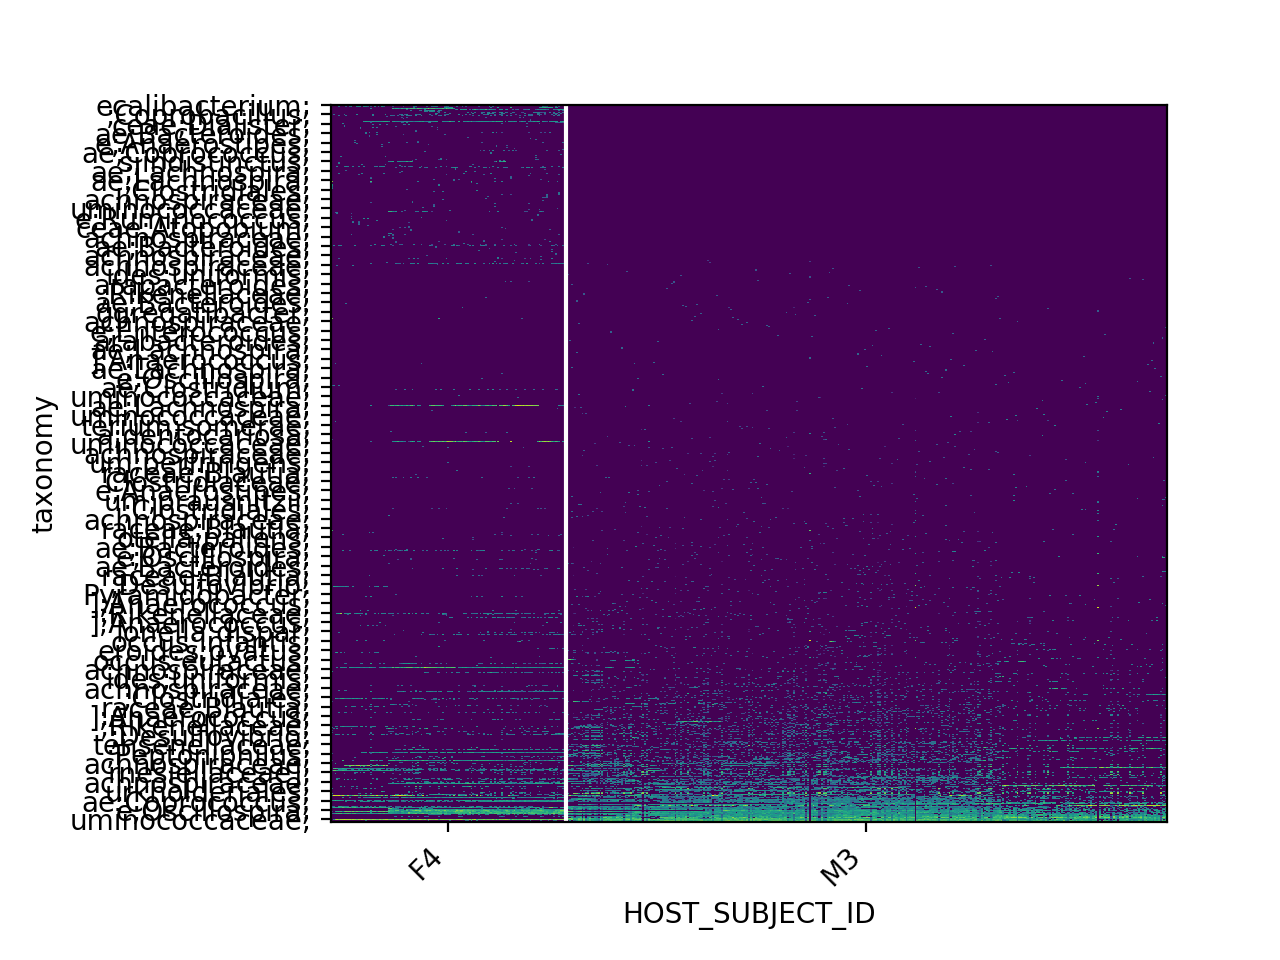

In [23]:
tt.plot_sort('HOST_SUBJECT_ID',gui='jupyter')

## find sOTUs correlated with time in M3

In [24]:
tt = feces.filter_samples('HOST_SUBJECT_ID','M3')

In [25]:
dd = tt.correlation('DAYS_SINCE_EXPERIMENT_START')

2017-03-12 21:41:17 INFO method spearman for field DAYS_SINCE_EXPERIMENT_START. Positive correlated features : 64. Negative correlated features : 193. total 257


We get 259 features with significant correlation following FDR control.

Note features are sorted by the effect size (biggest/smallest correlation is top/bottom)

<IPython.core.display.Javascript object>


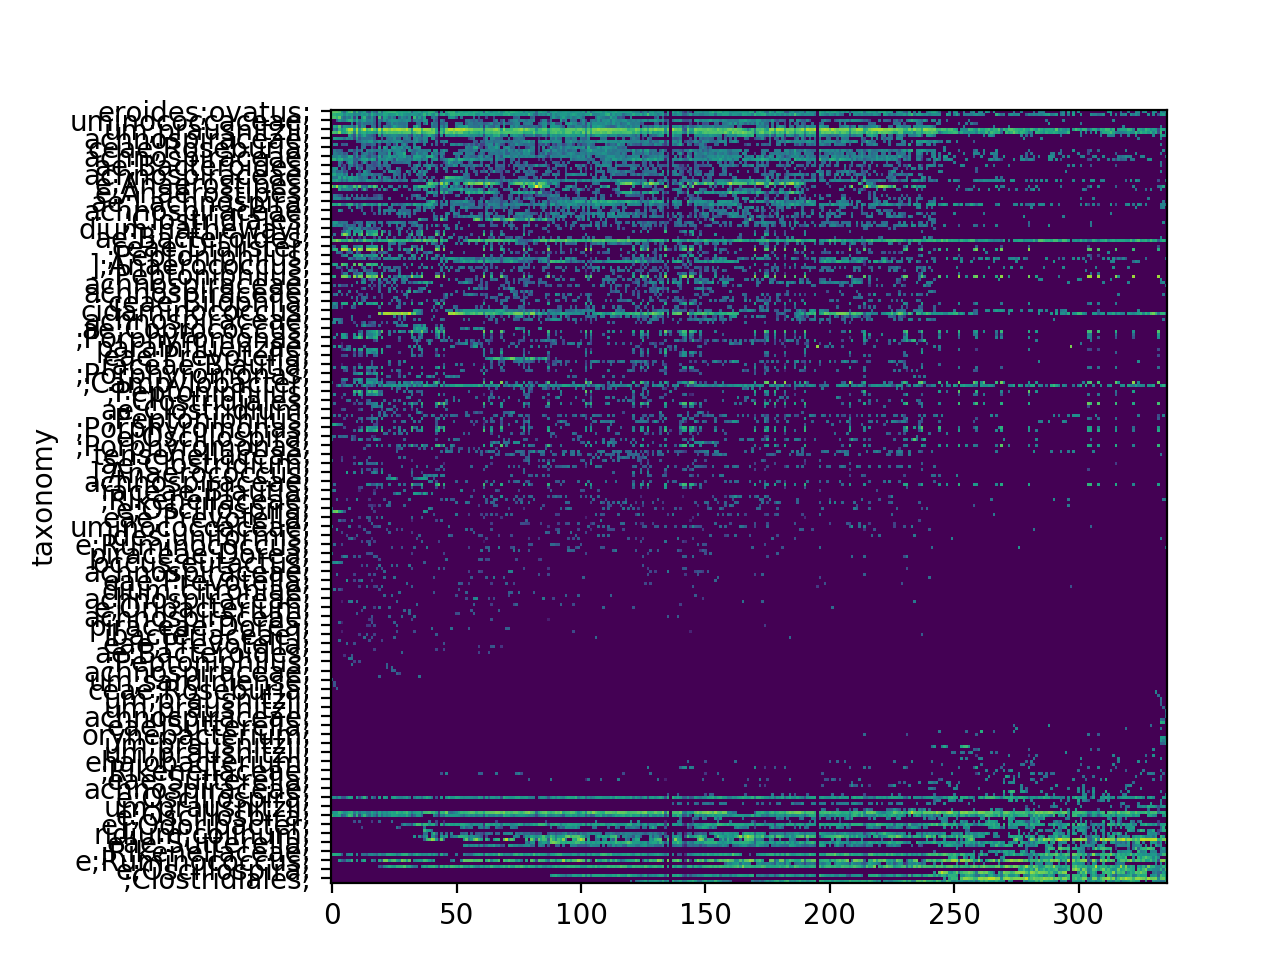

In [26]:
dd.plot(gui='jupyter')

# Eric Alm dataset
## Data from:
**Host lifestyle affects human microbiota on daily timescales**

*David, L. A., Materna, A. C., Friedman, J., Campos-Baptista, M. I., Blackburn, M. C., Perrotta, A., ... & Alm, E. J. (2014)*

*Genome biology, 15(7)*

In [173]:
alm=ca.read_amplicon('data/alm.biom','data/alm.samples.txt',filter_reads=1000,normalize=10000)

2017-03-12 22:58:19 INFO loaded 811 samples, 7289 observations
2017-03-12 22:58:20 INFO 806 remaining


Get rid of the 'unknown' days and convert to number

In [174]:
alm.sample_metadata['collection_day']=alm.sample_metadata.collection_day.replace('unknown', -1).astype(float)

## DonorA was abroad days 71-122, let's add another column with that info

In [175]:
alm.sample_metadata['travel'] = 'no'
alm.sample_metadata.loc[(alm.sample_metadata.host_subject_id == 'DonorA') & 
                        (71 <= alm.sample_metadata.collection_day) &
                        (alm.sample_metadata.collection_day <=122), 'travel'] = 'yes'

## Both donors had diarrhea at some time points
be careful with what you eat

In [176]:
alm.sample_metadata['diarrhea'] = 'no'
alm.sample_metadata.loc[(alm.sample_metadata.host_subject_id == 'DonorB') & 
                        (151 <= alm.sample_metadata.collection_day) &
                        (alm.sample_metadata.collection_day <=159), 'diarrhea'] = 'yes'
alm.sample_metadata.loc[(alm.sample_metadata.host_subject_id == 'DonorB') & 
                        (alm.sample_metadata.collection_day > 159), 'diarrhea'] = 'after'

In [177]:
alm.sample_metadata.loc[(alm.sample_metadata.host_subject_id == 'DonorA') & 
                        (80 <= alm.sample_metadata.collection_day) &
                        (alm.sample_metadata.collection_day <=85), 'diarrhea'] = 'yes'
alm.sample_metadata.loc[(alm.sample_metadata.host_subject_id == 'DonorA') & 
                        (104 <= alm.sample_metadata.collection_day) &
                        (alm.sample_metadata.collection_day <=113), 'diarrhea'] = 'yes'


## Take the fecal samples

In [178]:
alm.sample_metadata['body_site'].unique()

array(['UBERON:feces', 'UBERON:tongue'], dtype=object)

In [184]:
alm_feces = alm.filter_samples('body_site','UBERON:feces')
alm_saliva = alm.filter_samples('body_site','UBERON:tongue')

In [180]:
alm_feces.sort_samples('collection_day',inplace=True)

AmpliconExperiment alm.biom with 521 samples, 7289 features

In [181]:
alm_feces.cluster_features(min_abundance=10,inplace=True)

2017-03-12 23:00:09 INFO 811 remaining


AmpliconExperiment alm.biom with 521 samples, 811 features

Let's plot it with per-sample color bars showing the travel and diarrhea status

<IPython.core.display.Javascript object>


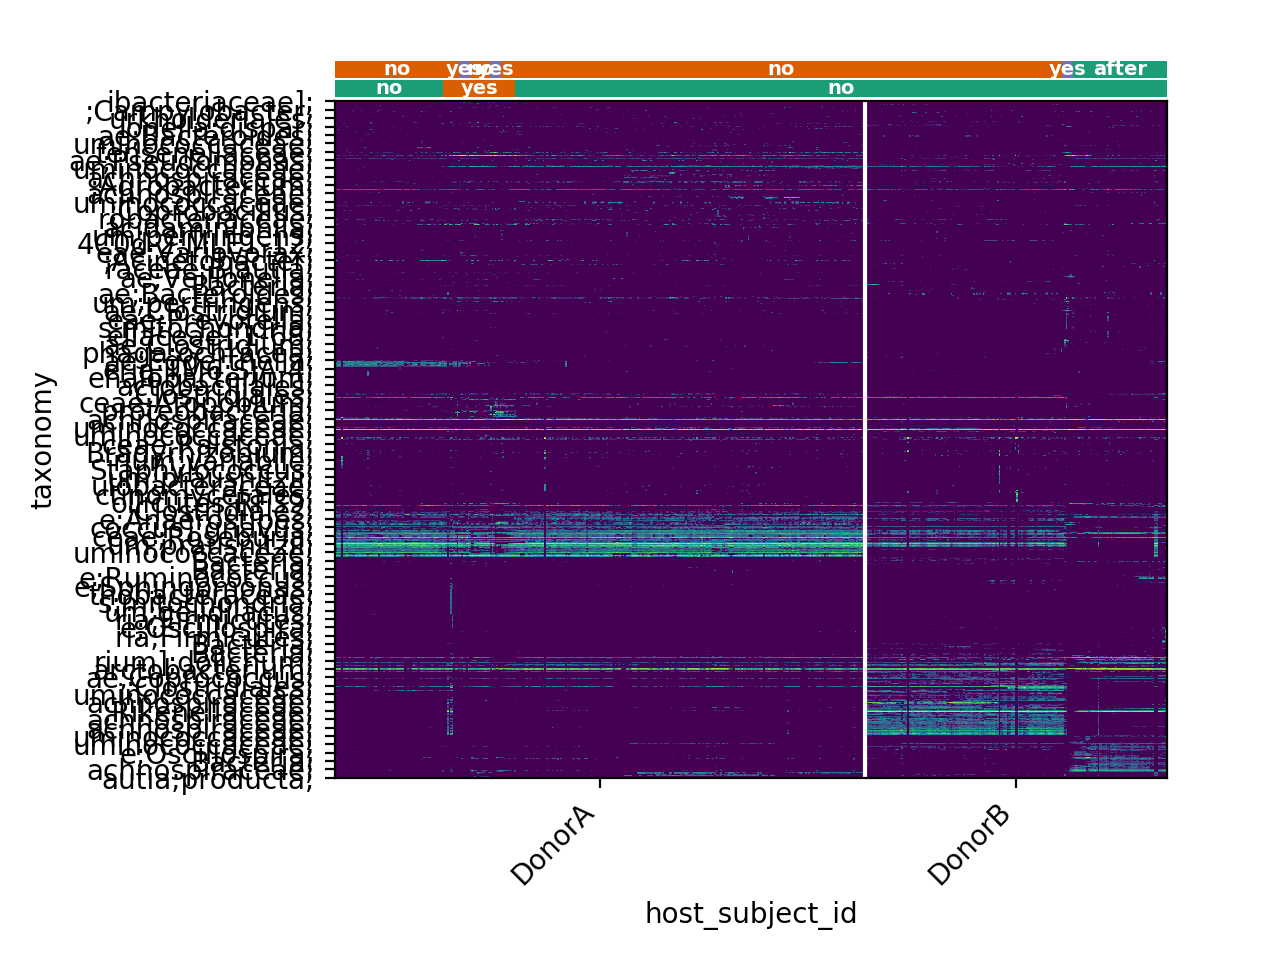

In [183]:
alm_feces.plot_sort('host_subject_id',gui='jupyter', sample_color_bars=['travel','diarrhea'])

In [186]:
alm_saliva.sort_samples('collection_day',inplace=True)

AmpliconExperiment alm.biom with 285 samples, 7289 features

In [187]:
alm_saliva.cluster_features(min_abundance=10,inplace=True)

2017-03-12 23:02:55 INFO 320 remaining


AmpliconExperiment alm.biom with 285 samples, 320 features

<IPython.core.display.Javascript object>


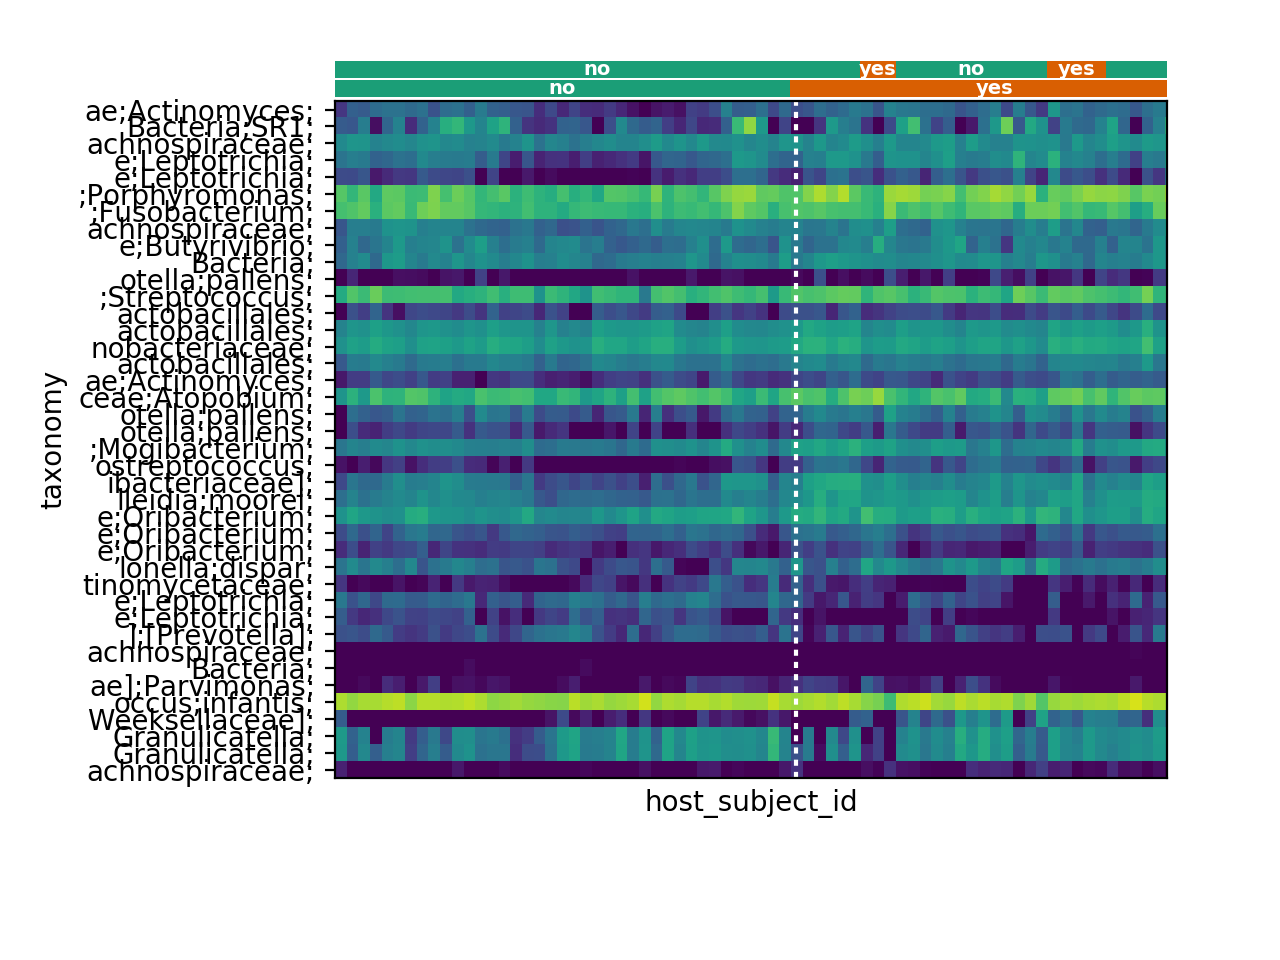

In [188]:
alm_saliva.plot_sort('host_subject_id',gui='jupyter', sample_color_bars=['travel','diarrhea'])